[ 0.00796672 -0.09125939]
[ 0.04620638 -0.05680878]
[ 0.02203957 -0.02519619]
[ 0.00533685 -0.00675812]
[ 0.00090446 -0.00162885]
[ 6.34794565e-05 -4.42987679e-04]


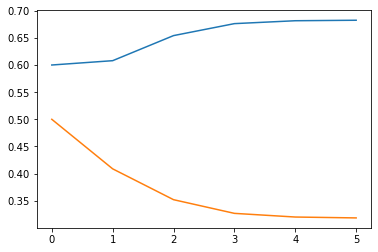

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
def get_binomial_log_likelihood(obs,probs):
    N = sum(obs);
    k = obs[0]
    binomial_coeff = math.factorial(N) / (math.factorial(N-k) * math.factorial(k))
    prod_probs = obs[0]*math.log(probs[0]) + obs[1]*math.log(1-probs[0])
    log_lik = binomial_coeff + prod_probs
    return log_lik
data=[]
with open("Ex08.csv") as tsv:
    for line in csv.reader(tsv):    
        data=[int(i) for i in line]
head_counts = np.array(data)
tail_counts = 10-head_counts
experiments = list(zip(head_counts,tail_counts))
pA_heads = np.zeros(100); pA_heads[0] = 0.60
pB_heads = np.zeros(100); pB_heads[0] = 0.50
delta = 0.001  
j = 0
improvement = float('inf')
while (improvement>delta):
    expectation_A = np.zeros((len(experiments),2), dtype=float) 
    expectation_B = np.zeros((len(experiments),2), dtype=float)
    for i in range(0,len(experiments)):
        e = experiments[i] 
        ll_A = get_binomial_log_likelihood(e,np.array([pA_heads[j],1-pA_heads[j]])) 
        ll_B = get_binomial_log_likelihood(e,np.array([pB_heads[j],1-pB_heads[j]])) 
        weightA = math.exp(ll_A) / ( math.exp(ll_A) + math.exp(ll_B) ) 
        weightB = math.exp(ll_B) / ( math.exp(ll_A) + math.exp(ll_B) ) 
        expectation_A[i] = np.dot(weightA, e) 
        expectation_B[i] = np.dot(weightB, e) 
    pA_heads[j+1] = sum(expectation_A)[0] / sum(sum(expectation_A)); 
    pB_heads[j+1] = sum(expectation_B)[0] / sum(sum(expectation_B)); 
    improvement = ( max( abs(np.array([pA_heads[j+1],pB_heads[j+1]]) - 
                    np.array([pA_heads[j],pB_heads[j]]) )) )
    print(np.array([pA_heads[j+1],pB_heads[j+1]]) - 
                    np.array([pA_heads[j],pB_heads[j]]) )
    j = j+1
plt.figure();
plt.plot(range(0,j),pA_heads[0:j])
plt.plot(range(0,j),pB_heads[0:j])
plt.show()